# Advantage and Disadvantage
When you have advantage, you roll two d20 and choose the highest. Disadvantage is same, but you choose the lowest.
Let's write some code and calculate expectation and deviation:

In [1]:
def exp(outcomes):
    exp = 0.
    for i in outcomes:
        exp += i
    exp /= len(outcomes)
    return exp

def dev(outcomes):
    dev = 0.
    for i in outcomes:
        dev += i ** 2
    dev /= len(outcomes)
    dev -= exp(outcomes) ** 2
    return dev

advantage_outcomes = [max(x, y) for x in range(1, 21) for y in range(1, 21)]
disadvantage_outcomes = [min(x, y) for x in range(1, 21) for y in range(1, 21)]

print("Advantage expectation: " + str(exp(advantage_outcomes)))
print("Advantage deviation: " + str(dev(advantage_outcomes)))
print("Disadvantage expectation: " + str(exp(disadvantage_outcomes)))
print("Disadvantage deviation: " + str(dev(disadvantage_outcomes)))

Advantage expectation: 13.825
Advantage deviation: 22.194375
Disadvantage expectation: 7.175
Disadvantage deviation: 22.194375


As it can be seen, advantage adds $3.325$ to the mean and disadvantage subtracts the same value, while both of their deviations are lowered by somewhat around $11$, which means improved consistency of throws (if you don't know to what values I'm talking, be sure to check the [Math](./Math.ipynb) section).

# Ability checks and saving throws: Alas, poor advantage!
## Advantage versus +3 bonus: fight!
As we have just seen, advantage must be strictly better than a +$3$ bonus, because it's more consistent (bare bonus has same deviation as usual roll, $33.25$) and it's mean value is higher than that of bare +$3$ bonus, which will be equal to $13.5$. But is it really *better* in all situations? Let's find out.

Here's the graphic that shows probability to succeed on a check while having either +$3$ bonus to it or an advantage.

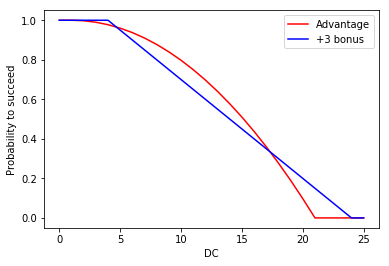

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def passes(DC, roll, bonus):
    return roll + bonus >= DC

adv_dc_pass = []
bn3_dc_pass = []

for DC in range(26):
    adv_cnt = 0.
    bn3_cnt = 0.
    for adv_out in advantage_outcomes:
        if passes(DC, adv_out, 0):
            adv_cnt += 1
    for bn3_out in range(1, 21):
        if passes(DC, bn3_out, 3):
            bn3_cnt += 1
    adv_dc_pass.append(adv_cnt / len(advantage_outcomes))
    bn3_dc_pass.append(bn3_cnt  / 20)
            
plt.plot(adv_dc_pass, 'r', label='Advantage')
plt.plot(bn3_dc_pass, 'b', label='+3 bonus')
plt.ylabel("Probability to succeed")
plt.xlabel("DC")
plt.legend()
plt.show()

Сounterintuitively, in *some* cases constant bonus is better than advantage. It can be seen that when Difficulty Class is bigger or equal to $18$, constant bonus is strictly better in terms of probability.

It happens because when rolling with advantage, but without any bonuses, you just *can't* get any value that exceeds $20$, but with bare bonus the result can be up to $23$, which results in bare bonus being better against high DC.

## New contender: resistance&guidance!
Disclaimer: I will not write resistance & guidance every time. Instead, I will call it *residence*. No explanation provided.

Effect of the *residence* is quite simple: it adds d4 to the saving throw (resistance) or an ability check (guidance).

It seems that the *residence* spell is inferior to both +$3$ bonus and advantage, because it's mean is equal to $13$, and it's deviation is even bigger than deviation of usual roll - $34.5$ against $33.25$! But our intuition failed us once, so let's give *residence* a try.

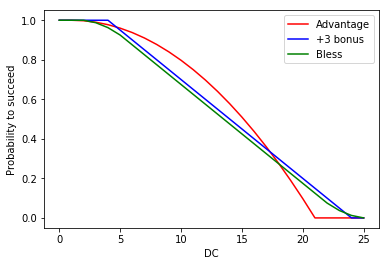

In [3]:
res_dc_pass = []

for DC in range(26):
    res_cnt = 0.
    for i in range(1, 21):
        for j in range(1, 5):
            if passes(DC, i, j):
                res_cnt += 1
    res_dc_pass.append(res_cnt / 80)

plt.plot(adv_dc_pass, 'r', label='Advantage')
plt.plot(bn3_dc_pass, 'b', label='+3 bonus')
plt.plot(res_dc_pass, 'g', label='Bless')
plt.ylabel("Probability to succeed")
plt.xlabel("DC")
plt.legend()
plt.show()

We were almost right, in **most** cases, *residence* is slightly inferior than +$3$ bonus, and it behaves in almost the same way - it overcomes advantage on some AC values. But if you're perceptive enough, you can see, that in the very end of the graphic *bless* overcomes +$3$ bonus. It happens, when DC is equal to $24$:

In [4]:
print("Bless chance to hit AC 23: " + str(res_dc_pass[24]))
print("+3 bonus chance to hit AC 23: " + str(bn3_dc_pass[24]))

Bless chance to hit AC 23: 0.0125
+3 bonus chance to hit AC 23: 0.0


Why does this happen? Simply because +$3$ bonus can't pass $24$ DC, while *residence* can do this on crit and $4$ rolled on an additional dice.

# Attacks: from zero to hero!
Advantage may make poor impression when talking about ability checks and saving throws. But in terms of attacking it really shines. It happens mostly because of crit on the roll of $20$ and guaranteed miss on the roll of $1$. Let's put advantage back on it's pedestal!

Talking about attacks, we must consider not only when attack hits or not, but also about damage of that attack. And, as you remember, we roll twice as many damage dice on a critical hit. Let us consider simple [club](https://roll20.net/compendium/dnd5e/Club#h-Club "Club") as our weapon, because even with it's small damage die, advantage will shine.

First, let's compare **chances to hit** an enemy while having advantage and +$3$ bonus to the attack:

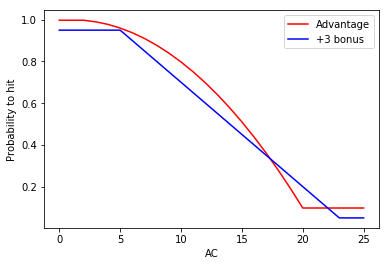

In [5]:
def hits(AC, roll, bonus):
    return (roll + bonus >= AC and roll != 1) or roll == 20

adv_ac_hits = []
bn3_ac_hits = []

for AC in range(26):
    adv_cnt = 0.
    bn3_cnt = 0.
    for out in advantage_outcomes:
        if hits(AC, out, 0):
            adv_cnt += 1
    for out in range(1, 21):
        if hits(AC, out, 3):
            bn3_cnt += 1
    adv_ac_hits.append(adv_cnt / len(advantage_outcomes))
    bn3_ac_hits.append(bn3_cnt / 20)
    
plt.plot(adv_ac_hits, 'r', label='Advantage')
plt.plot(bn3_ac_hits, 'b', label='+3 bonus')
plt.ylabel("Probability to hit")
plt.xlabel("AC")
plt.legend()
plt.show()

As it can be seen, now advantage is looking much better, but bare bonus still surpasses it on high values of AC, on the segment from $18$ to $23$ to be exact. Now let's replace probability to hit with an average damage value of a hit.

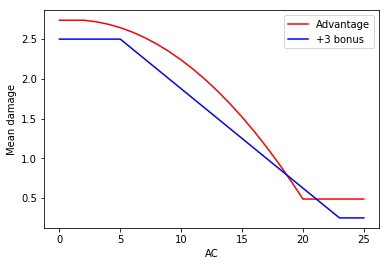

In [6]:
club_damage_mean = 2.5
club_damage_crit_mean = 5

adv_ac_dmg = []
bn3_ac_dmg = []

for AC in range(26):
    adv_cnt = 0.
    bn3_cnt = 0.
    for out in advantage_outcomes:
        if hits(AC, out, 0):
            adv_cnt += club_damage_crit_mean if out == 20 else club_damage_mean
    for out in range(1, 21):
        if hits(AC, out, 3):
            bn3_cnt += club_damage_crit_mean if out == 20 else club_damage_mean
    adv_ac_dmg.append(adv_cnt / len(advantage_outcomes))
    bn3_ac_dmg.append(bn3_cnt / 20)
    
plt.plot(adv_ac_dmg, 'r', label='Advantage')
plt.plot(bn3_ac_dmg, 'b', label='+3 bonus')
plt.ylabel("Mean damage")
plt.xlabel("AC")
plt.legend()
plt.show()

Now advantage greatly overcomes bare bonus in most cases, except for AC values of $19$, $20$ and $21$.

## New-old contender: bless.
*Bless* spell affects attack rolls in the same way as *residence* affects saving throws and ability checks: by adding a d4 to the result.

Let's include it in our competition for damage averages:

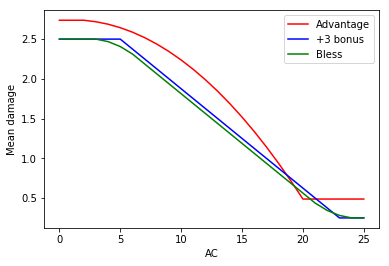

In [7]:
bls_ac_dmg = []

for AC in range(26):
    bls_cnt = 0.
    for out in range(1, 21):
        for bls in range(1, 5):
            if hits(AC, out, bls):
                bls_cnt += club_damage_crit_mean if out == 20 else club_damage_mean
    bls_ac_dmg.append(bls_cnt / 80)
    
plt.plot(adv_ac_dmg, 'r', label='Advantage')
plt.plot(bn3_ac_dmg, 'b', label='+3 bonus')
plt.plot(bls_ac_dmg, 'g', label='Bless')
plt.ylabel("Mean damage")
plt.xlabel("AC")
plt.legend()
plt.show()

*Bless* overcomes advantage on AC of $20$ and bare +$3$ bonus on AC of $23$, but in other cases it's strictly inferior.

### Honorable mention: Elven Accuracy
This feat is incredible in my opinion. Let's calculate expectation and deviation of a roll that is affected by this *triple-advantage feat*.

In [8]:
elven_outcomes = [max(x, y, z) for x in range(1, 21) for y in range(1, 21) for z in range(1, 21)]

print("Elven accuracy expectation: " + str(exp(elven_outcomes)))
print("Elven accuracy deviation: " + str(dev(elven_outcomes)))

Elven accuracy expectation: 15.4875
Elven accuracy deviation: 14.95834375


This feat adds $4.9875$ to the expectation and reduces deviation by somewhat around $18$, which means **greatly** improved consistency.

Let's just check it's damage average compared to usual advantage and +$3$ bonus:

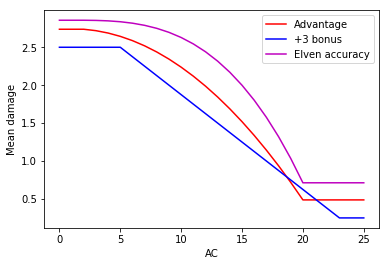

In [9]:
elv_ac_dmg = []

for AC in range(26):
    elv_cnt = 0.
    for out in elven_outcomes:
        if hits(AC, out, 0):
            elv_cnt += club_damage_crit_mean if out == 20 else club_damage_mean
    elv_ac_dmg.append(elv_cnt / len(elven_outcomes))
    
plt.plot(adv_ac_dmg, 'r', label='Advantage')
plt.plot(bn3_ac_dmg, 'b', label='+3 bonus')
plt.plot(elv_ac_dmg, 'm', label='Elven accuracy')
plt.ylabel("Mean damage")
plt.xlabel("AC")
plt.legend()
plt.show()

As it can be easily seen, *elven accuracy* is far superior than any other type of bonus. We have a honorable mentioned winner!